<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet_Outlier_removal_maually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install prophet

In [45]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

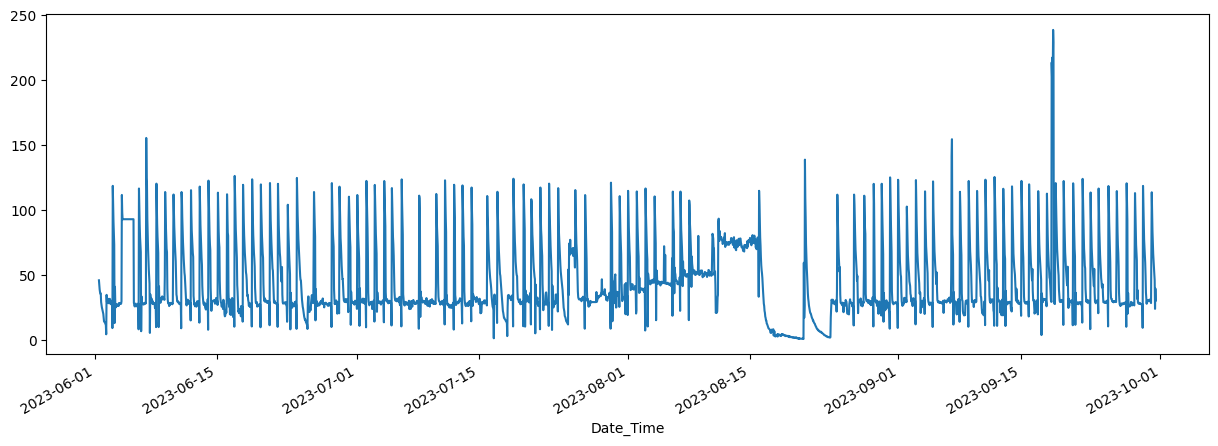

In [46]:
df = pd.read_csv('C1 Spread 1 from 06 to 09_outlier_removalV2.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

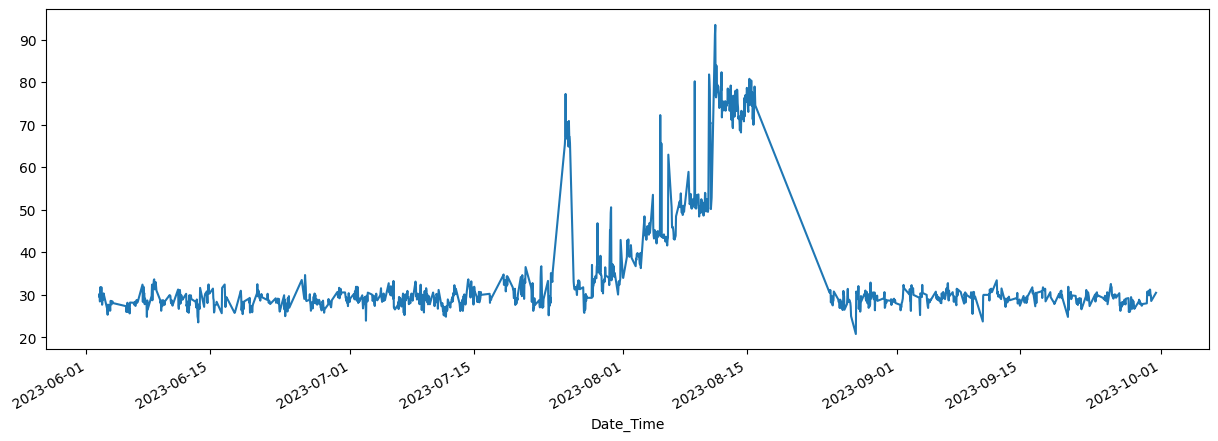

In [47]:
df[df["GT Gross MW"]>190]["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [ ]:

#Power0 = df[df["GT Gross MW"] ==0].index
#GETE0 = df[df["GT Exhaust Outlet Temp Exp"] ==0].index

#print(np.all(Power0 == GETE0))

In [48]:
df.head()

,BPC1 1MGHMV013XI,Combust Monitor Actual Spread 1,GT Exhaust Outlet Temp,Turbine Speed In RPM,GT Gross MW,GT Turbine Inlet Temperature,GT Exhaust Outlet Temp Exp,Ambient Dry Bulb Temperature,Barometric Pressure,Relative Humidity
Date_Time,,,,,,,,,,
2023-06-01 11:10:00,"06/01/2023 11:10:14, 46.084114074707",46.084114,0.0,5.242575,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 12:10:00,"06/01/2023 12:10:14, 42.6662826538086",42.666283,0.0,5.247316,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 13:10:00,"06/01/2023 13:10:14, 38.970344543457",38.970345,0.0,5.247211,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 14:10:00,"06/01/2023 14:10:14, 36.9424591064453",36.942459,0.0,5.242203,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01 15:10:00,"06/01/2023 15:10:14, 35.7623672485352",35.762367,0.0,5.246573,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_p = df[['Combust Monitor Actual Spread 1']].copy()

In [50]:
df_p['Date_Time'] = df_p.index

In [51]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-06-01 11:10:00,46.084114,2023-06-01 11:10:00
2023-06-01 12:10:00,42.666283,2023-06-01 12:10:00
2023-06-01 13:10:00,38.970345,2023-06-01 13:10:00
2023-06-01 14:10:00,36.942459,2023-06-01 14:10:00
2023-06-01 15:10:00,35.762367,2023-06-01 15:10:00


In [52]:
df_p.tail()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-09-30 07:10:14,51.038200,2023-09-30 07:10:14
2023-09-30 08:10:14,46.250725,2023-09-30 08:10:14
2023-09-30 09:10:14,24.120710,2023-09-30 09:10:14
2023-09-30 10:10:14,39.756451,2023-09-30 10:10:14
2023-09-30 11:10:14,30.507504,2023-09-30 11:10:14


In [53]:
df_p.columns = ['y', 'ds']

In [54]:
df_p.head()

,y,ds
Date_Time,,
2023-06-01 11:10:00,46.084114,2023-06-01 11:10:00
2023-06-01 12:10:00,42.666283,2023-06-01 12:10:00
2023-06-01 13:10:00,38.970345,2023-06-01 13:10:00
2023-06-01 14:10:00,36.942459,2023-06-01 14:10:00
2023-06-01 15:10:00,35.762367,2023-06-01 15:10:00


In [55]:
m = Prophet()

In [56]:
m.fit(df_p)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/te2ywfh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/crlx4tyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58481', 'data', 'file=/tmp/tmpupdvt11o/te2ywfh6.json', 'init=/tmp/tmpupdvt11o/crlx4tyq.json', 'output', 'file=/tmp/tmpupdvt11o/prophet_modeldv5e3k7h/prophet_model-20231023121718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future = m.make_future_dataframe(periods=300, freq = 'H')

In [58]:
future.tail()

,ds
3200,2023-10-12 19:10:14
3201,2023-10-12 20:10:14
3202,2023-10-12 21:10:14
3203,2023-10-12 22:10:14
3204,2023-10-12 23:10:14


In [59]:
forecast = m.predict(future)

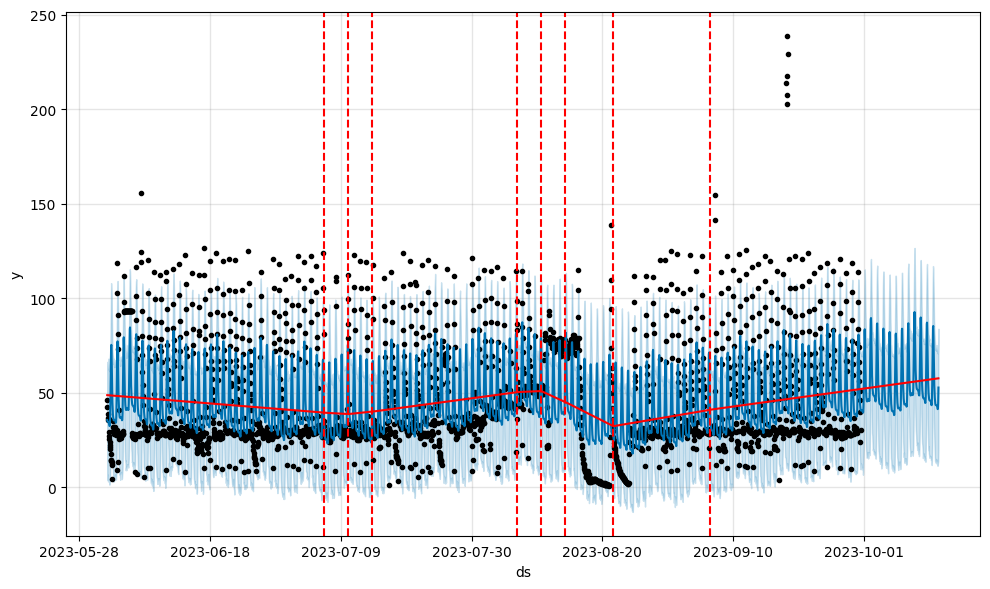

In [60]:
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

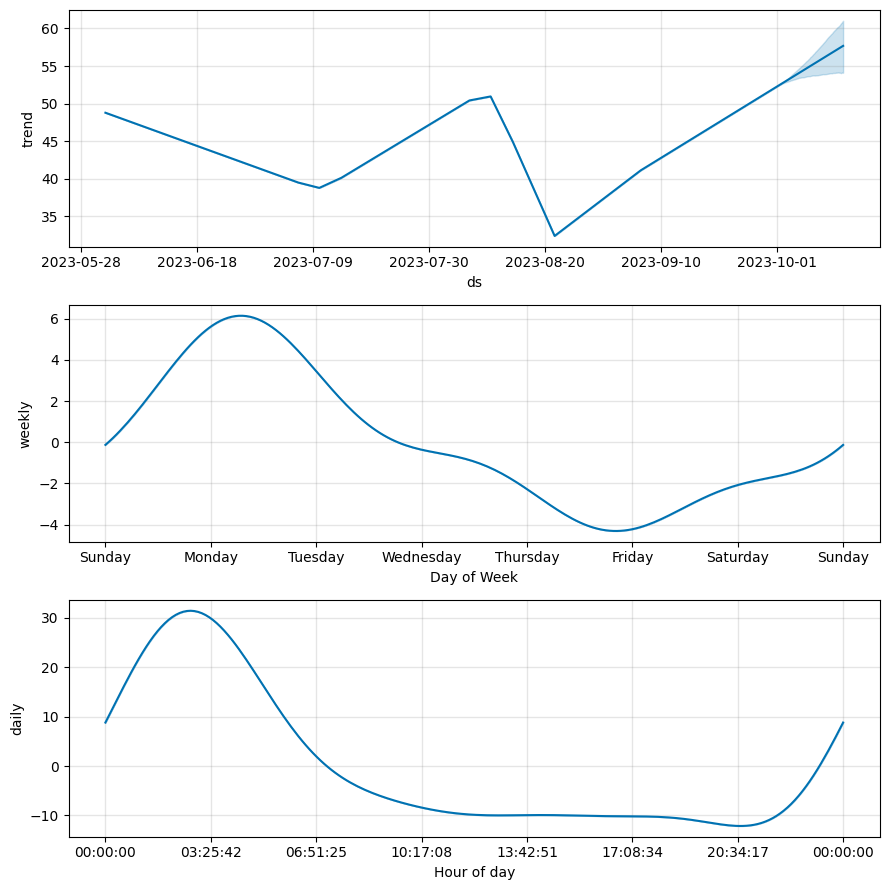

In [61]:
m.plot_components(forecast);

In [62]:
df_p2 = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p2['Date_Time'] = df_p2.index

In [63]:
df_p2.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-06-02 11:10:00,29.635532,2023-06-02 11:10:00
2023-06-02 12:10:00,30.289629,2023-06-02 12:10:00
2023-06-02 13:10:00,28.462751,2023-06-02 13:10:00
2023-06-02 14:10:00,31.812954,2023-06-02 14:10:00
2023-06-02 15:10:00,29.296486,2023-06-02 15:10:00


In [64]:
df_p2.columns = ['y', 'ds']
df_p2.head()

,y,ds
Date_Time,,
2023-06-02 11:10:00,29.635532,2023-06-02 11:10:00
2023-06-02 12:10:00,30.289629,2023-06-02 12:10:00
2023-06-02 13:10:00,28.462751,2023-06-02 13:10:00
2023-06-02 14:10:00,31.812954,2023-06-02 14:10:00
2023-06-02 15:10:00,29.296486,2023-06-02 15:10:00


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/z4e52wue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/a_bv4xsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99173', 'data', 'file=/tmp/tmpupdvt11o/z4e52wue.json', 'init=/tmp/tmpupdvt11o/a_bv4xsm.json', 'output', 'file=/tmp/tmpupdvt11o/prophet_modelxmzacgbp/prophet_model-20231023121736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


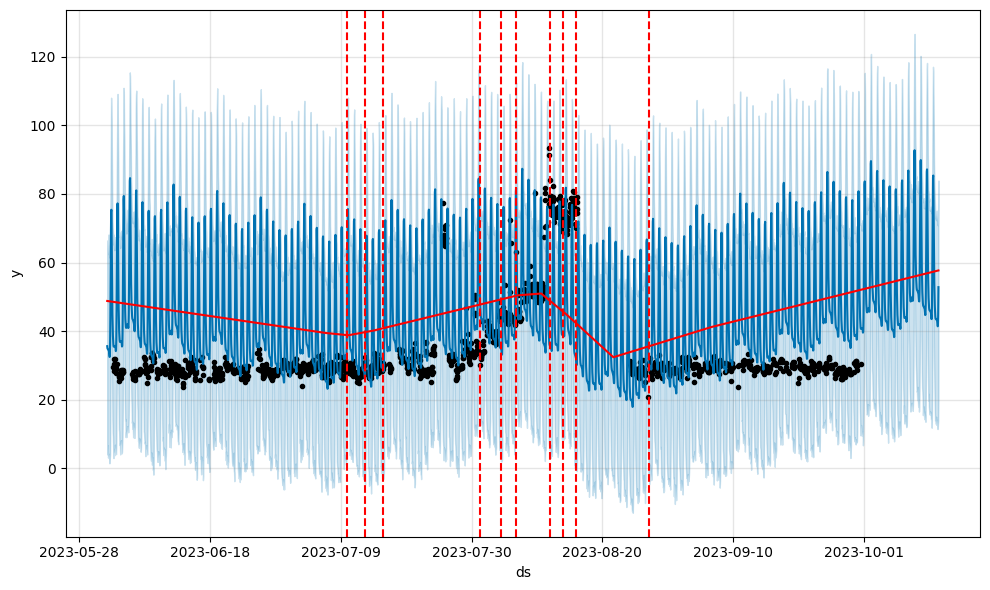

In [65]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=300, freq = 'H')
forecast2 = m2.predict(future2)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

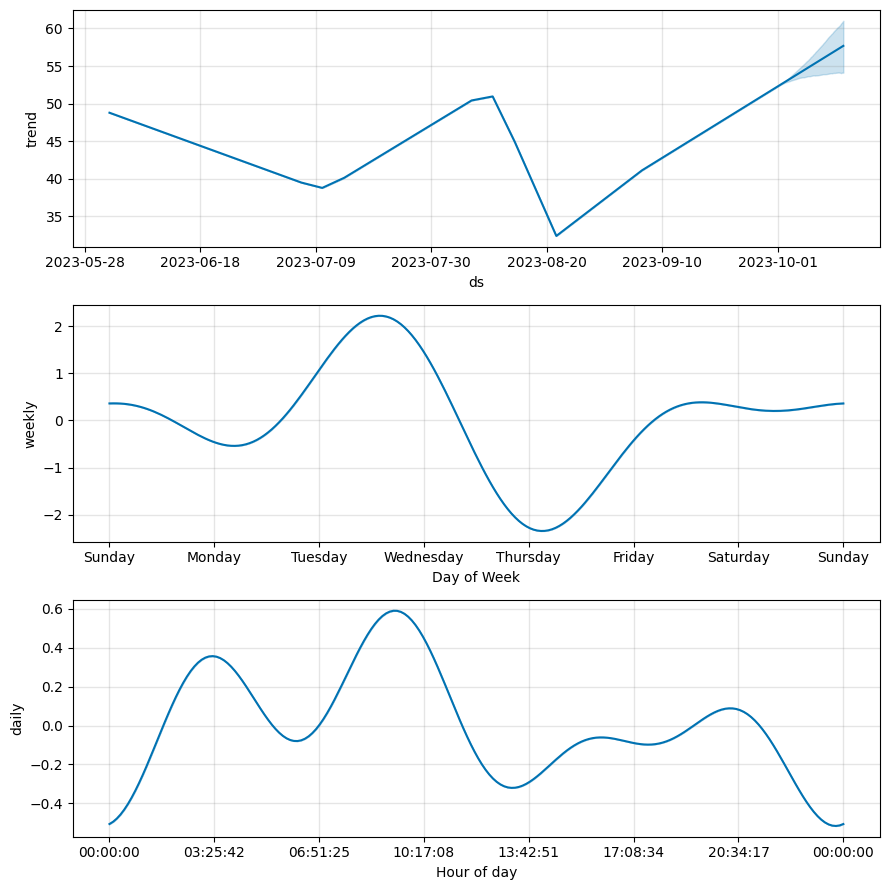

In [66]:
m2.plot_components(forecast);

In [67]:
m3 = Prophet(seasonality_mode='multiplicative')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/lmprw8et.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/udc1xgu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45816', 'data', 'file=/tmp/tmpupdvt11o/lmprw8et.json', 'init=/tmp/tmpupdvt11o/udc1xgu6.json', 'output', 'file=/tmp/tmpupdvt11o/prophet_modelpkcnr8ah/prophet_model-20231023121741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


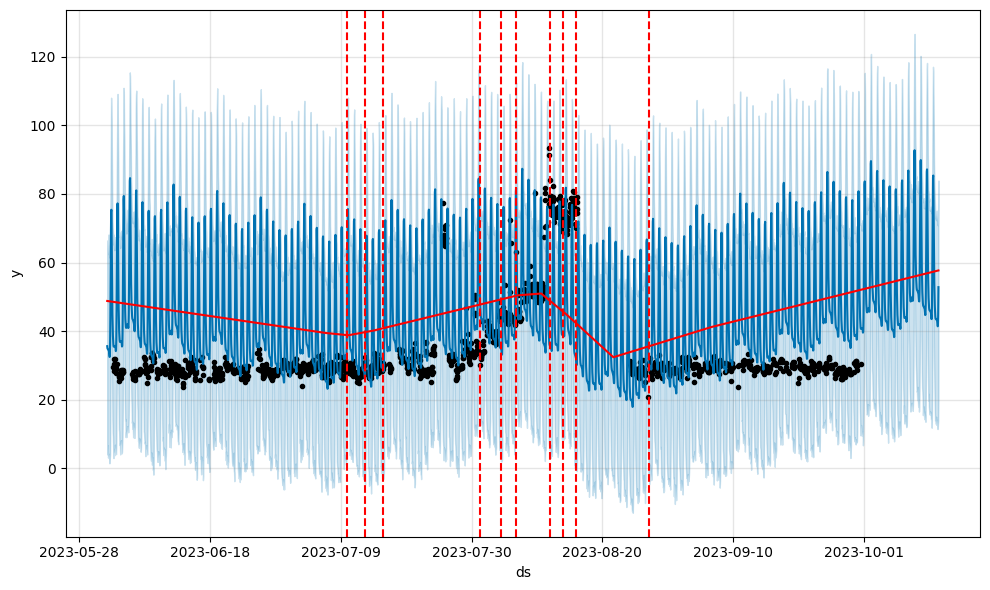

In [68]:
m3.fit(df_p2)
future2 = m2.make_future_dataframe(periods=300, freq = 'H')
forecast2 = m2.predict(future2)
fig = m2.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

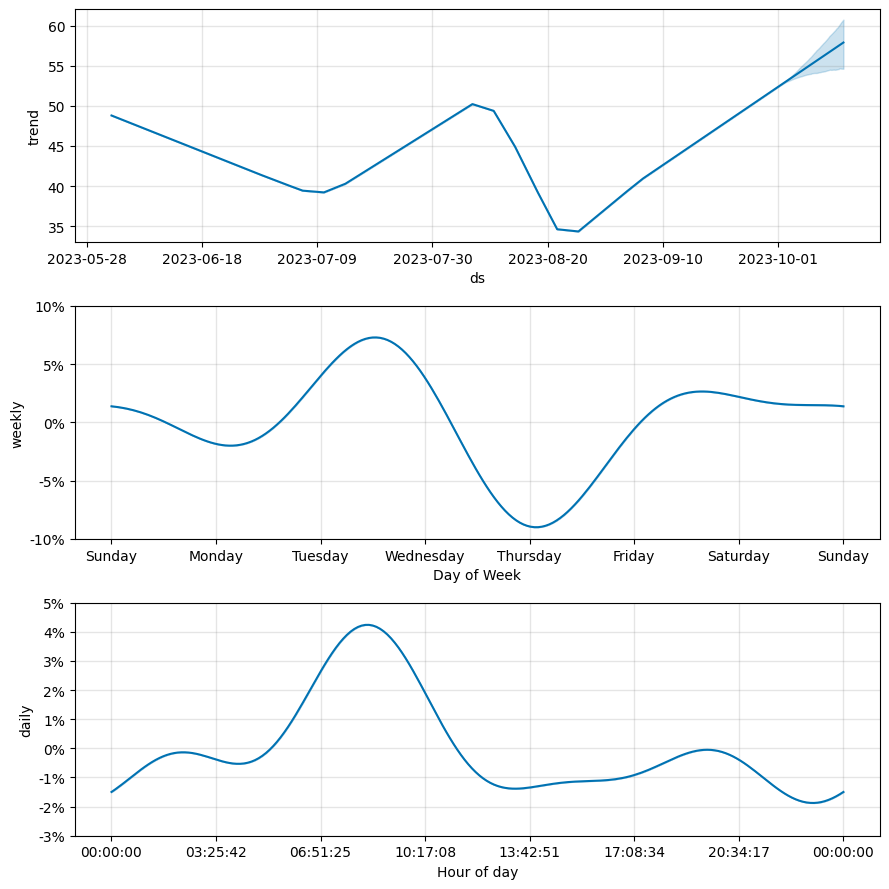

In [35]:
m3.plot_components(forecast);

In [69]:
df_p2.head()

,y,ds
Date_Time,,
2023-06-02 11:10:00,29.635532,2023-06-02 11:10:00
2023-06-02 12:10:00,30.289629,2023-06-02 12:10:00
2023-06-02 13:10:00,28.462751,2023-06-02 13:10:00
2023-06-02 14:10:00,31.812954,2023-06-02 14:10:00
2023-06-02 15:10:00,29.296486,2023-06-02 15:10:00


In [70]:
logdf = df_p2.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-06-02 11:10:00,3.388974,2023-06-02 11:10:00
2023-06-02 12:10:00,3.410805,2023-06-02 12:10:00
2023-06-02 13:10:00,3.348596,2023-06-02 13:10:00
2023-06-02 14:10:00,3.459874,2023-06-02 14:10:00
2023-06-02 15:10:00,3.377468,2023-06-02 15:10:00


In [71]:
m3 = Prophet()

In [72]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/3r6vlith.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/m8cjk1s7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29791', 'data', 'file=/tmp/tmpupdvt11o/3r6vlith.json', 'init=/tmp/tmpupdvt11o/m8cjk1s7.json', 'output', 'file=/tmp/tmpupdvt11o/prophet_modelcim67ign/prophet_model-20231023121756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [74]:
forecast = m3.predict(future)

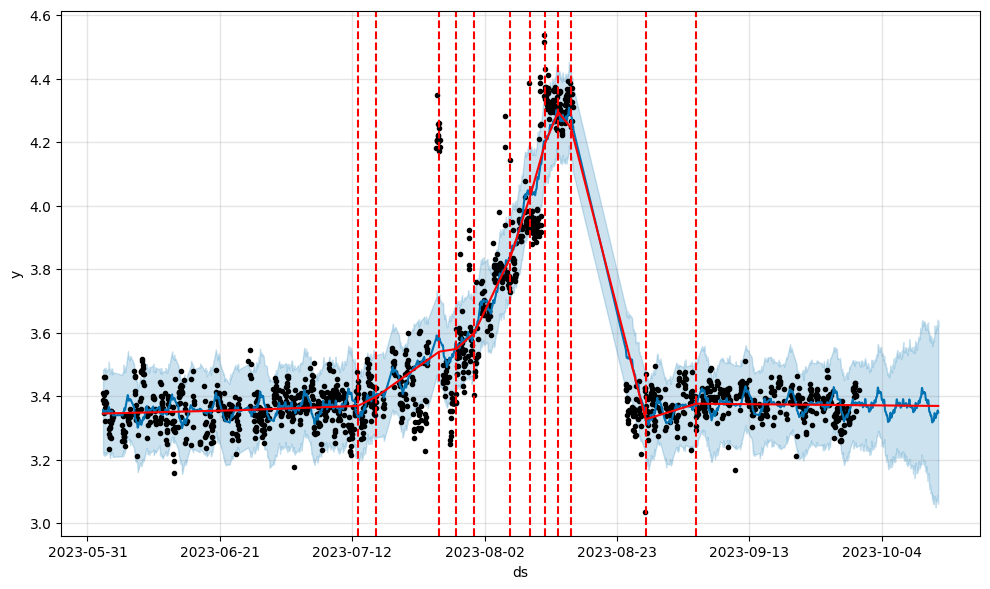

In [75]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

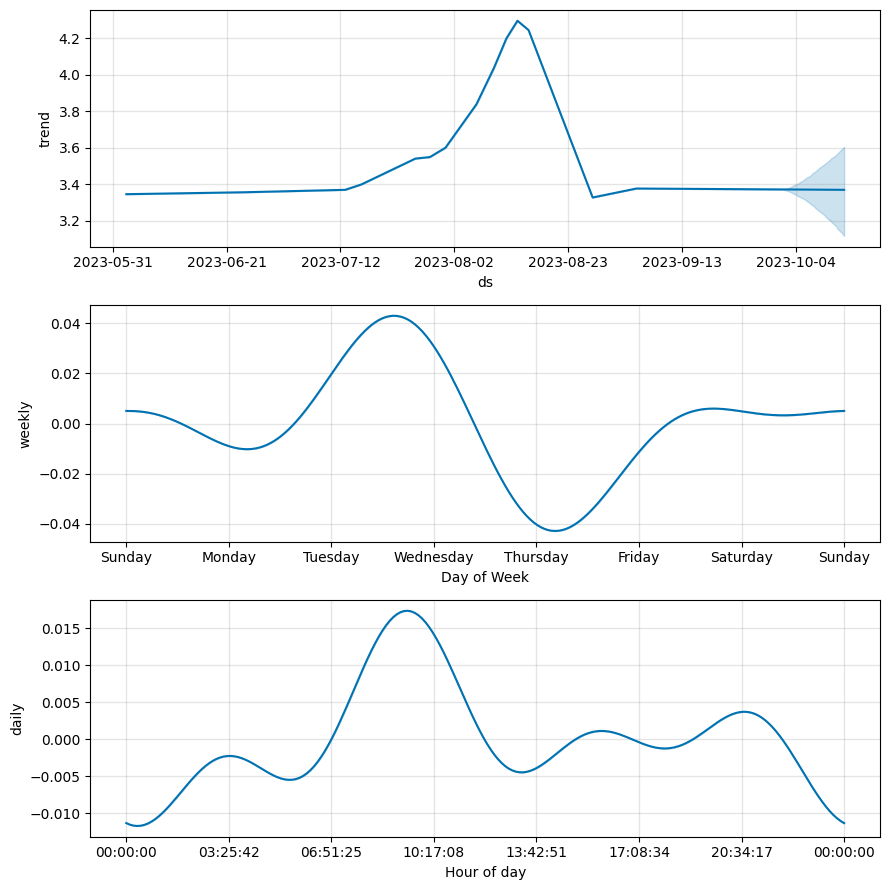

In [76]:
m3.plot_components(forecast);

In [78]:
from prophet.diagnostics import cross_validation

In [84]:
df_cv = cross_validation(
    m3,
    initial='720 hours',
    period='24 hours',
    horizon='48 hours')

INFO:prophet:Making 81 forecasts with cutoffs between 2023-07-02 23:10:14 and 2023-09-28 11:10:14


  0%|          | 0/81 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/mrr250x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/yk15ueik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6255', 'data', 'file=/tmp/tmpupdvt11o/mrr250x0.json', 'init=/tmp/tmpupdvt11o/yk15ueik.json', 'output', 'file=/tmp/tmpupdvt11o/prophet_model1p403r0h/prophet_model-20231023122704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/6kqn2vs2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpupdvt11o/7g21c15m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [85]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-07-03 10:10:00,3.363917,3.294001,3.440644,3.405032,2023-07-02 23:10:14
1,2023-07-03 11:10:00,3.358122,3.286529,3.428425,3.401037,2023-07-02 23:10:14
2,2023-07-03 12:10:00,3.351128,3.280810,3.431187,3.353765,2023-07-02 23:10:14
3,2023-07-03 13:10:00,3.346148,3.275503,3.413040,3.361204,2023-07-02 23:10:14
4,2023-07-03 14:10:00,3.344419,3.273322,3.410072,3.373283,2023-07-02 23:10:14
...,...,...,...,...,...,...
2303,2023-09-29 19:10:14,3.380036,3.249811,3.498877,3.441927,2023-09-28 11:10:14
2304,2023-09-29 20:10:14,3.383024,3.252623,3.505779,3.403266,2023-09-28 11:10:14
2305,2023-09-29 21:10:14,3.382812,3.255805,3.505490,3.399130,2023-09-28 11:10:14
2306,2023-09-29 22:10:14,3.377196,3.240504,3.502799,3.352721,2023-09-28 11:10:14


In [86]:
from prophet.diagnostics import performance_metrics

In [87]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 05:59:46,0.082346,0.286959,0.180255,0.052230,0.032645,0.051413,0.593478
1,0 days 06:00:00,0.087261,0.295399,0.182547,0.053005,0.034235,0.051980,0.603804
2,0 days 06:59:46,0.085802,0.292920,0.187149,0.054266,0.036430,0.053557,0.568207
3,0 days 07:00:00,0.094449,0.307325,0.192394,0.055951,0.035900,0.054785,0.580435
4,0 days 07:59:46,0.091882,0.303121,0.196121,0.056841,0.038144,0.056124,0.551852
...,...,...,...,...,...,...,...,...
81,1 days 22:00:00,0.073561,0.271221,0.153177,0.042120,0.023132,0.041429,0.567391
82,1 days 22:59:46,0.073848,0.271750,0.155079,0.042907,0.024226,0.042288,0.556777
83,1 days 23:00:00,0.107002,0.327112,0.180480,0.050683,0.025721,0.048908,0.545257
84,1 days 23:59:46,0.107312,0.327585,0.183339,0.051706,0.025998,0.050083,0.538941


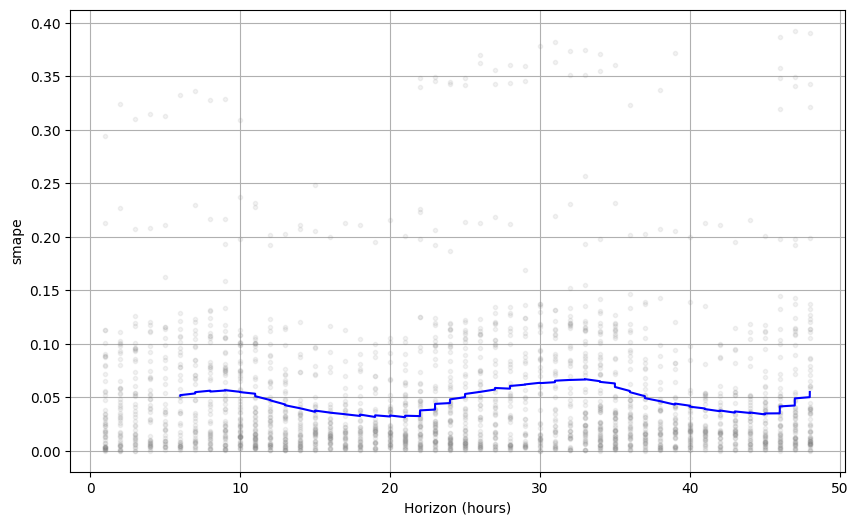

In [88]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [89]:
pm['smape'].mean()

0.04750430826732823